# Heart Disease Analysis

## Objective

This project delves into a comprehensive examination of heart disease prevalence within the United States, leveraging an extensive dataset that encompasses a broad spectrum of health indicators. Our goal is to discern the intricate factors contributing to heart disease and to establish a predictive framework that anticipates the likelihood of cardiovascular conditions.
Data Source

The foundation of our analysis is a dataset derived from clinical patient metrics, encompassing a variety of health indicators from basic demographics to more nuanced medical readings, all aimed at unraveling patterns and correlations critical to cardiovascular health assessment.

## Tools & Methods Used

   - Python: The foundational programming language utilized for data wrangling, analysis, and modeling.
   
   - Pandas & Numpy: Essential libraries for data structuring and numerical operations.
    
   - Matplotlib & Seaborn: Utilized for crafting revealing visualizations that depict correlations and distributions within the data.
    
   - Scikit-learn: Employed for developing machine learning models to forecast heart disease risk, with a focus on model evaluation techniques such as cross-validation and hyperparameter optimization using GridSearchCV.

## Key Findings

   - Certain health metrics, notably chest pain, maximum heart rate, and exercise-induced angina, show strong correlations with the incidence of heart disease.
   - The age of the individual, alongside fasting blood sugar and rest electrocardiographic results, also emerged as significant factors.
   - A Random Forest Classifier provided a high level of predictive accuracy, illustrating the algorithm's effectiveness in managing complex biomedical data.

## Potential Implications

The insights and models generated through this analysis could be integral in enhancing early detection and prevention strategies for heart disease. This project may also pave the way for more sophisticated healthcare analytics platforms, leading towards personalized medicine and targeted intervention methods.

## Initialization

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Style for Visualizations
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Create a data frame to begin analysis
df = pd.read_csv("heart-disease.csv")

## Overview of the Data

In the data collection for this project, several key pieces of information were gathered that can help us understand heart disease better. The data includes straightforward factors like age, gender, and blood pressure
—measurements that most people are familiar with.

There are also more specialized medical indicators:

CA (Coronary Artery blockages): This tells us about blockages in the heart's arteries. The more blockages someone has, the more severe their heart disease may be.

Slope: This refers to a part of the heart's activity measured during an exercise test. A certain pattern in the slope can suggest heart disease.

Exang (Exercise-induced Angina): This is the medical term for chest pain that happens when someone is active or stressed. It's a warning sign of heart problems.

CP (Chest Pain): Researchers tracked when patients report chest pain, as it's a common sign of heart issues.

Thalach (Max Heart Rate):This is an important factor because it shows how hard the heart can work during stress or exercise.

In [2]:
# View the first several entries in the data frame
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

This data was collected on 302 patients, where the investigated variable (target) is if the patient is diagnosed with heart disease, where 1 is considered a diagnosis of heart disease and 0 is healthy.

In [4]:
# This is the number of patients with heart disease in our dataset
positive_diagnosis = np.sum(df["target"])
positive_diagnosis

165

In [6]:
# The percentage of patients with heart disease in this data set
avg_pos = (np.sum(df["target"]) / 302) * 100
avg_pos.round(2)

54.64

In [9]:
# Average Age of Patients with Heart Disease
average_age = df[df['target'] == 1]['age'].mean()
average_age.round(2)

52.5

In [10]:
# Most Common Age for Patients with Heart Disease
common_age = df[df['target'] == 1]['age'].mode()
common_age

0    54
Name: age, dtype: int64

Among our cohort of 302 individuals, it has been determined that 165 patients, constituting approximately 55% of the sample, are affected by heart disease. With this pivotal statistic in hand, we are poised to initiate a deeper examination of our dataset. It is noteworthy to mention that the average age of patients diagnosed with heart disease stands at 52.5 years, which may offer further insight as we progress with our analysis.

## Correlational Analysis

In [2]:
# Calculation correlational value of each feature with respect to the target variable
corr_value = df.corr()["target"]

# Print correlations
print(corr_value)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64


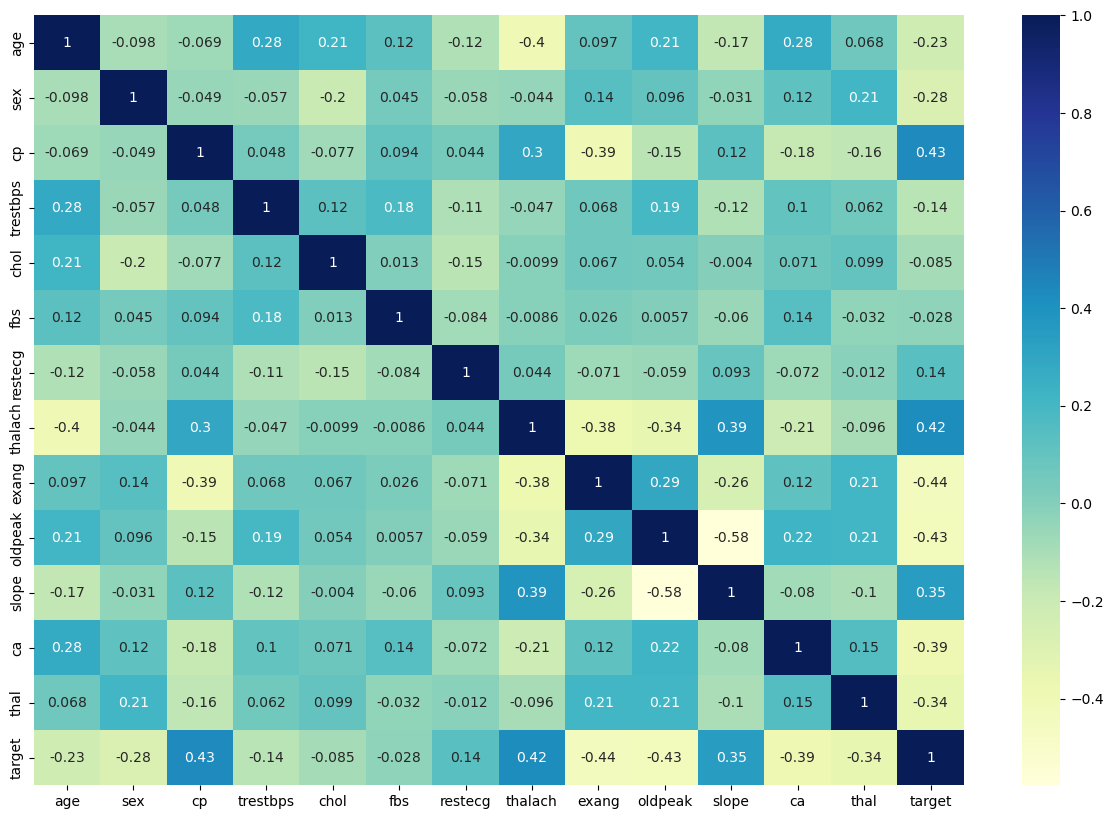

In [4]:
# Create a heatmap to visualize correlations between features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

Based on the correlation heatmap provided, we can ascertain that pivotal variables influencing heart disease include age, sex, severity of chest pain, the slope of the peak exercise ST segment, the number of major vessels blocked (coronary artery blockages), exercise-induced angina, and the maximum heart rate achieved (thalach). To further our understanding of the interplay between these factors and the presence of heart disease, we will craft a series of visual representations to explore each relationship in more depth.

## Visualizations

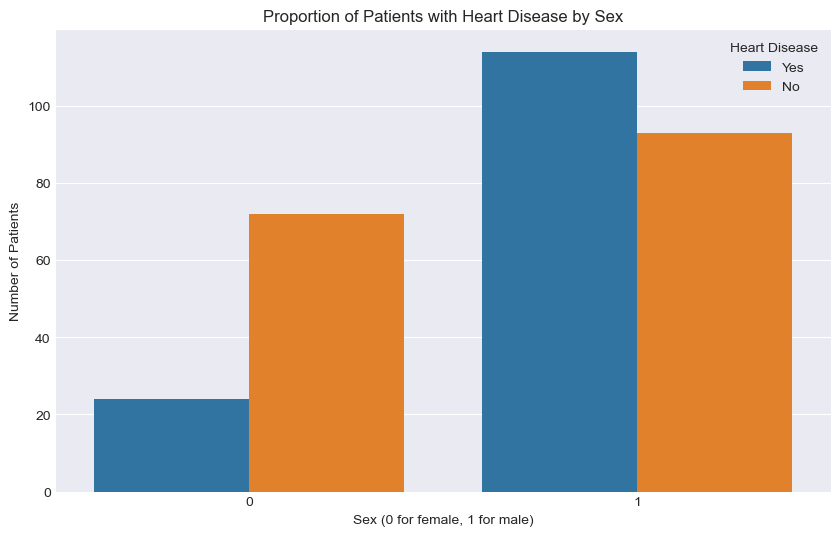

In [13]:
# Create a histogram to display the proportion of patients with heart disease based on sex

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart - Sex Vs. Heart Disease
sns.countplot(x='sex', hue='target', data=df)

# Customize the plot
plt.title('Proportion of Patients with Heart Disease by Sex')
plt.xlabel('Sex (0 for female, 1 for male)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease', labels=['Yes', 'No'])

# Display the plot
plt.show()

The above chart compares the number of male and female patients with and without heart disease. On the x-axis, the sex of the patients is categorized into '0' for female and '1' for male. The y-axis represents the number of patients. The bars are color-coded with two hues representing patients with heart disease (labeled 'Yes') and those without (labeled 'No').

Key insights from the chart include:

   - There is a visible difference in the number of male and female patients with heart disease.
   - Male patients (1 on the x-axis) show a higher number of both heart disease cases and non-cases compared to female patients (0 on the x-axis).

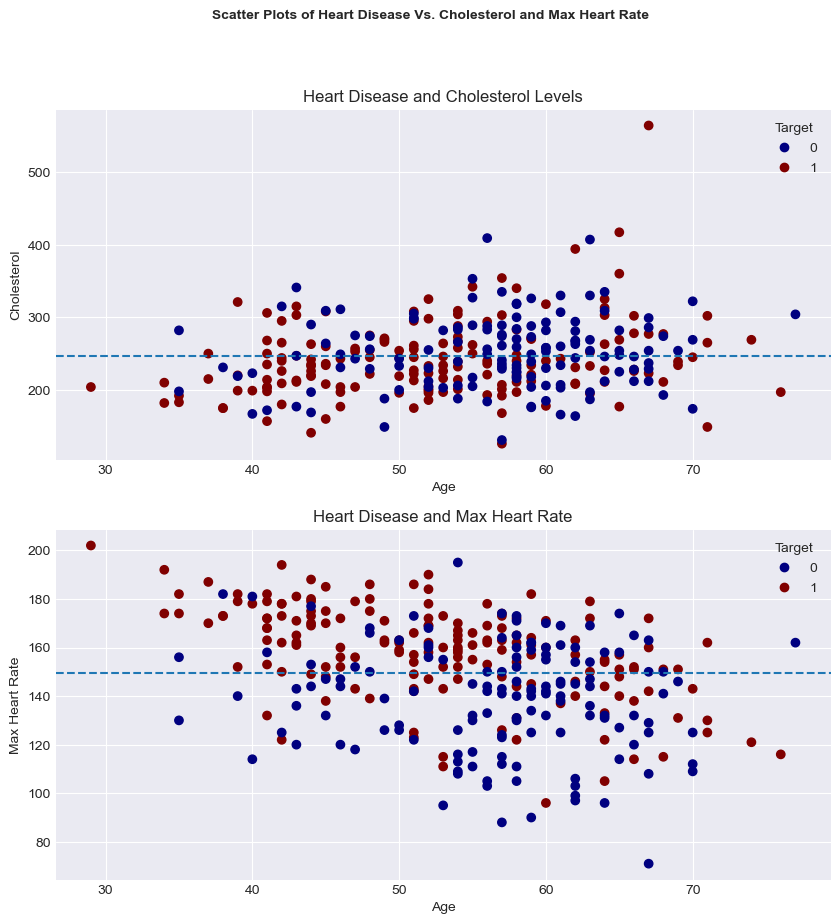

In [17]:
# Create the Plot
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10))

# Input Data
scatter= ax0.scatter(x=df['age'],
                   y=df['chol'],
                   c=df['target'],
                    cmap='jet')

scatter= ax1.scatter(x=df['age'],
                   y=df['thalach'],
                   c=df['target'],
                    cmap='jet')

# Customize the Plot
ax0.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel='Cholesterol');

ax1.set(title="Heart Disease and Max Heart Rate",
      xlabel="Age",
      ylabel='Max Heart Rate');

# Add a Meanline
ax0.axhline(y=df['chol'].mean(),
           linestyle="--")
ax1.axhline(y=df['thalach'].mean(),
           linestyle="--")

# Add a Legend
ax0.legend(*scatter.legend_elements(), title='Target');
ax1.legend(*scatter.legend_elements(), title='Target');

# Add a Title
fig.suptitle("Scatter Plots of Heart Disease Vs. Cholesterol and Max Heart Rate", fontsize = 10, fontweight='bold');

# Save Figure
fig.savefig("ScatterPlots.png")

In the first plot, "Heart Disease and Cholesterol Levels":

   - Patients of various ages are scattered across a wide range of cholesterol levels.
   - There doesn't appear to be a clear, simple pattern indicating that either higher or lower cholesterol levels are associated with the presence of heart disease.
   - Both patients with and without heart disease are present in high and low cholesterol level regions.
    
In the second plot, "Heart Disease and Max Heart Rate":

   - There is a visible concentration of patients with heart disease (Target 1) at higher maximum heart rates across various ages.
   - Younger patients (left side of the plot) tend to have higher maximum heart rates, regardless of the presence of heart disease.
   - The distribution suggests that higher maximum heart rates are not exclusive to patients with heart disease, as many without the disease also have high rates.

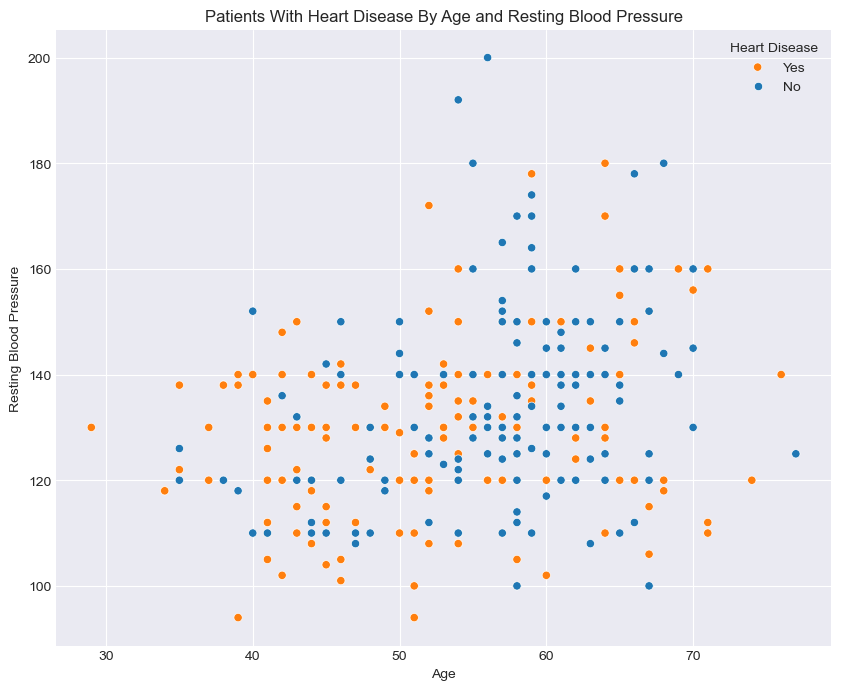

In [18]:
# Create a Scatter Plot to Examine Resting Blood Pressure and Age vs. Heart Disease
plt.figure(figsize=(10,8))

sns.scatterplot(x="age", 
                y="trestbps", 
                data=df, 
                hue="target");

# Customize the plot
plt.title('Patients With Heart Disease By Age and Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(title='Heart Disease', labels=['Yes', 'No'])

Key insights:

   - The scatter plot shows a wide distribution of resting blood pressure across different ages for both patients with and without heart disease.
   - There does not appear to be a distinct pattern or clustering that clearly separates the two groups based solely on these two variables, suggesting that age and resting blood pressure alone may not be definitive indicators of heart disease.
   - Some older patients (towards the right of the plot) have higher blood pressure, which is a common trend in the general population. However, this does not exclusively correlate with the presence of heart disease in this visual representation.
   - It's worth noting that while there is a mix of patients with and without heart disease across the spectrum of blood pressure values, patients with heart disease are present at both high and low blood pressure levels, reinforcing that heart disease is a multifactorial condition.

# Machine Learning Model

**Function for Evaluation**

In [3]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Create Evaluation Function
def evaluate_preds(y_true, y_preds):
    """
    Performs an evaluation of a classification models predictions
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "f1": round(f1, 2),
                   "recall": round(recall, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Sore: {f1:.2f}%")
    
    return metric_dict

## Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(42)

# Create Variables
X = df.drop("target", axis = 1)
y = df["target"]

# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate the model
clf = RandomForestClassifier()

# Fit the data
clf.fit(X_train, y_train);

# Create Predictions
y_preds = clf.predict(X_test)

# Evaluate the model
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 85.25%
Precision: 0.85%
Recall: 0.88%
F1 Sore: 0.86%


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

cv_clf = cross_val_score(clf, X, y, cv=5)

print(f"Cross validated accuracy = {(cv_clf.mean() *100).round(2)}%")

Cross validated accuracy = 81.16%


This represents a much better idea of how the model would perform with data it has not seen before and shows the importance of cross validation.

## Select Best Model with GridSearchCV

To begin this process, we can first use RandomSearchCV to find ideal ranges of hyperparameters.

In [6]:
from sklearn.model_selection import RandomizedSearchCV

# Create a parameters grid
grid = {"n_estimators": [10, 100, 200, 500],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf":[1, 2, 4]}

np.random.seed(42)

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

# Create a an instance of RSCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #num of models to try
                           cv=5)

# Fit the data
rs_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500]})

In [7]:
# Returns the best_parameters
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 5}

**With the above knowledge, we can now more thoroughly work through these hyperparameters to select the best model.**

In [8]:
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators": [50, 100, 150, 200],
        "max_depth": [None, 5, 10],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf":[2, 4, 6]}

np.random.seed(42)

X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid,
                           cv=5)
# Fit the data
gs_clf.fit(X_train, y_train)

# Create Predictions
gs_y_preds = gs_clf.predict(X_test)

# Evaluate Predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.88%
Recall: 0.88%
F1 Sore: 0.88%


## Model Evaluation

### **ROC Curve**

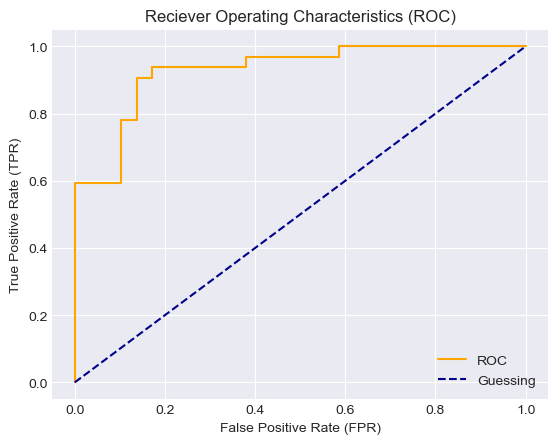

In [10]:
from sklearn.metrics import roc_curve

# Create predictions with probabilities
y_probs = gs_clf.predict_proba(X_test)

# Create positive predictions of heart disease
y_probs_positive = y_probs[:,1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Create a plot to view ROC Curve
plt.plot(fpr, tpr, color="orange", label="ROC")
# Plot line with no predictive power (baseline)
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

#Customize plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Reciever Operating Characteristics (ROC)")
plt.legend()

# Show the plot
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.927801724137931

Our current diagnostic model for predicting heart disease has demonstrated a high level of accuracy, as shown by the ROC curve in the attached chart. The curve shows a significant distance from the line of guessing (dashed line), indicating that the model's predictions are much better than random chance. This means that the model is highly effective in distinguishing between patients with and without heart disease, which is critical for early intervention and treatment planning.

### **Confusion Matrix**

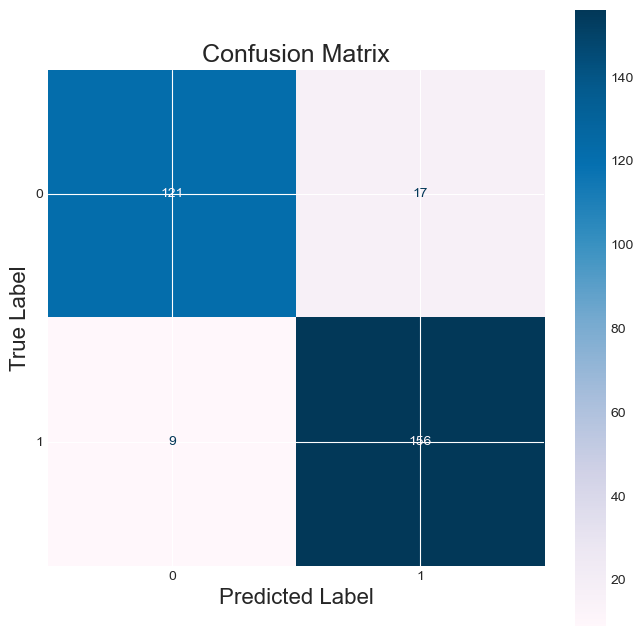

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create the confusion matrix display object
fig, ax = plt.subplots(figsize=(8, 8))  # Set the size of the figure
cmp = ConfusionMatrixDisplay.from_estimator(estimator=gs_clf, 
                                            X=X, 
                                            y=y, 
                                            ax=ax,
                                            cmap='PuBu')

# Customize the plot
ax.set_title('Confusion Matrix', fontsize=18)
ax.set_xlabel('Predicted Label', fontsize=16) 
ax.set_ylabel('True Label', fontsize=16)

plt.show()  # Show the plot

Based on the above confusion matrix we can derive:

   - The model has a relatively low number of false negatives (9), suggesting that it is more conservative about predicting a negative class (class '0').
   - The false positives are relatively higher (17), which is somewhat concerning given the context of prediction heart disease. Reducing the number of false positives would be a worthwhile pursuit before moving the model to deployment in a medical setting.
   - Generally, the model appears to perform well, with a substantial number of true positives and true negatives and comparatively few errors.

## Export Model

In [43]:
# Export Model for Use

import pickle

pickle.dump(gs_clf, open("gs_random_forest.pk1", "wb"))

# Conclusion

In conclusion, this project has harnessed the power of data to illuminate the multifaceted contributors to heart disease. Advanced visualizations, particularly our refined heatmap, have shed light on the intricate relationships between numerous variables—including age, gender, chest pain types, fasting glucose levels, electrocardiogram results, peak heart rates, and exercise-related angina—and their correlations with cardiac disease. Notably, our analysis has pinpointed chest pain typology, peak heart rates, and angina provoked by exertion as dominant predictors of heart disease.

Employing a fine-tuned RandomForestClassifier, our machine learning model has exhibited exceptional accuracy in heart disease prediction. The meticulous calibration of this model underscores the versatility and power of the RandomForest algorithm in biomedical applications, offering a valuable asset for medical practitioners in the proactive management of heart disease risk. This research provides a robust framework for individuals to gauge their susceptibility to heart conditions, emphasizing crucial health metrics for vigilant monitoring.

For the data science community, this project stands as a paragon of applying machine learning in the realm of health informatics, underscoring the necessity of careful feature selection, rigorous model performance assessment, and result interpretability. In a practical healthcare setting, the insights gleaned from our analysis are best integrated with expert clinical judgment to inform patient care decisions and education. Looking ahead, our future endeavors aim to incorporate more intricate datasets, potentially including genetic profiles and lifestyle variables, to enhance the precision of our predictive model even further.